In [24]:
from PIL import Image, ImageFilter
import csv
import cv2
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
def data_augmentation(image_path):
    def visualize(original, augmented):
        rgb1 = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
        rgb2 = cv2.cvtColor(augmented, cv2.COLOR_BGR2RGB)
        fig = plt.figure()
        plt.subplot(1, 2, 1)
        plt.title('Original image')
        plt.imshow(rgb1)
        print("origion",original.shape)
#         plt.imshow(original)
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.title('Augmented image')
        plt.imshow(rgb2)
        
        print("augmented",augmented.shape)
        plt.axis("off")

    image = cv2.imread(image_path)

    height, width = image.shape[:2]
    diagonal = np.sqrt(height ** 2 + width ** 2)
    padding = int((diagonal - min(height, width)) / 2)

    # Add padding to the image using BORDER_REFLECT or BORDER_REPLICATE mode
    padded_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REFLECT)

    # Rotate the padded image by 30 degrees
    rotated = rotate(padded_image, angle=30, reshape=False)

    # Remove the padding from the rotated image
    rotated_cropped = rotated[padding:-padding, padding:-padding]
    
    visualize(image, rotated_cropped)
    
    plt.show()

In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
from scipy.ndimage import rotate

origion (383, 461, 3)
augmented (383, 461, 3)


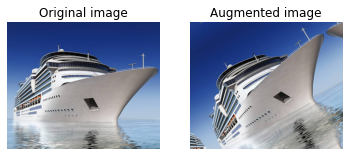

In [43]:
data_augmentation('./pictures/before_sampling/pic_ship/ship3.png')

In [25]:
from scipy.ndimage import rotate

def rotate_images_in_dataframe(input_df, angle=30):
    
    def rotate_image(image, angle):
        height, width = image.shape[:2]
        diagonal = np.sqrt(height ** 2 + width ** 2)
        padding = int((diagonal - min(height, width)) / 2)

        # Add padding to the image using BORDER_REFLECT or BORDER_REPLICATE mode
        padded_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REFLECT)

        # Rotate the padded image by the specified angle
        rotated = rotate(padded_image, angle=angle, reshape=False)

        # Remove the padding from the rotated image
        rotated_cropped = rotated[padding:-padding, padding:-padding]
        return rotated_cropped

    rotated_images = []
    for index, row in input_df.iterrows():
        image_pixels = row.values.reshape(image_height, image_width, image_channels)
        rotated_image = rotate_image(image_pixels, angle)
        rotated_images.append(rotated_image.flatten())  # Flatten the rotated image pixels

    columns = [f"Rotated_Pixel_{i}" for i in range(len(rotated_images[0]))]
    rotated_df = pd.DataFrame(rotated_images, columns=columns)
    return rotated_df


In [27]:
# Step 1: Read images and store them in a DataFrame
file='./pictures/before_rotate/ship2.csv'
# Read the CSV file into a DataFrame
df_images = pd.read_csv(file, usecols=lambda x: x != 'label')

# Define the image dimensions (you may need to adjust these according to your images)
image_height = 32
image_width = 32
image_channels = 3  # Assuming RGB images

# Step 2: Rotate the images and store the rotated images in a new DataFrame
angle_to_rotate = 30
df_rotated_images = rotate_images_in_dataframe(df_images, angle=angle_to_rotate)


In [38]:
def visualize(original, augmented):
    original = original.astype(np.uint8)
    augmented = augmented.astype(np.uint8)
    rgb1 = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    rgb2 = cv2.cvtColor(augmented, cv2.COLOR_BGR2RGB)
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(rgb1)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title('Augmented image')
    plt.imshow(rgb2)
    plt.axis("off")


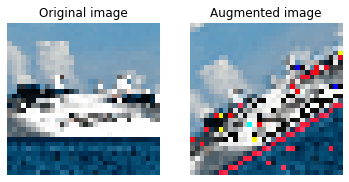

In [39]:
visualize(df_images.iloc[0,:].values.reshape(32,32,3),df_rotated_images.iloc[0,:].values.reshape(32,32,3))
# df_rotated_images.head()
# pic=np.array(df_rotated_images).reshape(32,32,3)
# plt.imshow(pic)
# print(pic.shape)